## data downsample
achen@2020-11-5

In [1]:
import pandas as pd
import os
import glob
from Bio import Seq
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import re
from scipy.stats import wilcoxon,mannwhitneyu
import numpy as np

In [32]:
df = pd.read_csv('../data/ERP005860.qc.new.txt')
df_raw = pd.read_csv('../data/ERP005860.qc.new.txt')

In [33]:
df['group'] = df['Sample ID'].str[0] + 'C'
df.columns

Index(['Sample ID', 'read_count', 'group'], dtype='object')

In [35]:
a = df[df['group'] == 'HC']['read_count']
b = df[df['group'] == 'LC']['read_count']
mannwhitneyu(a,b)

MannwhitneyuResult(statistic=5459.0, pvalue=0.0016302758430128197)

Text(0, 0.5, 'Read Count')

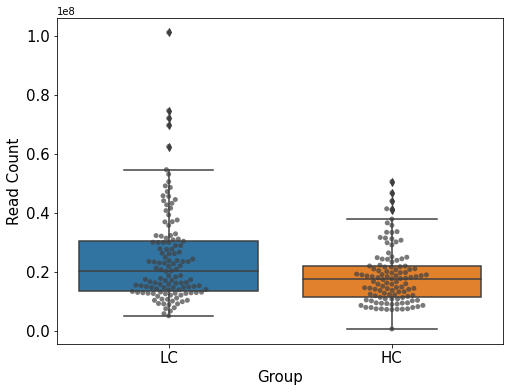

In [36]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df,x='group',y='read_count')
sns.swarmplot(data=df,x='group',y='read_count',color='0.25',alpha=0.7)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Group',fontsize=15)
plt.ylabel('Read Count',fontsize=15)

In [37]:
df.sort_values(by='read_count')

Sample ID  read_count group
84      HV-27      528125    HC
50      LV-25     4992663    LC
222      LV-2     5720896    LC
74      LV-19     6598695    LC
89       HV-8     7099565    HC
..        ...         ...   ...
124     LD-35    62367705    LC
141     LD-45    69546651    LC
60      LD-97    71960810    LC
75      LD-75    74558864    LC
158     LD-11   101043083    LC

[237 rows x 3 columns]

In [38]:
df = df[df['Sample ID']!='HV-27']

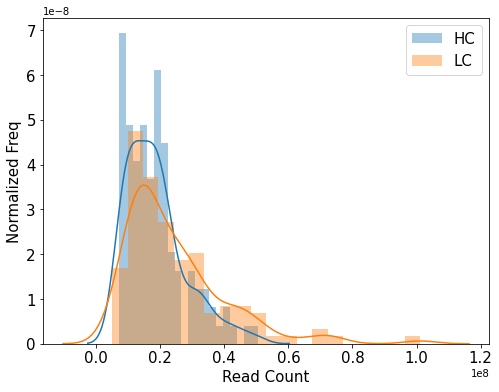

In [39]:
plt.figure(figsize=(8,6))

sns.distplot(df[df['group']=='HC']['read_count'],label='HC',bins=20)
sns.distplot(df[df['group']=='LC']['read_count'],label='LC',bins=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Normalized Freq',fontsize=15)
plt.xlabel('Read Count',fontsize=15)

plt.legend(fontsize=15)
plt.show()

In [40]:
df['read_count']

0      35654490
1      50472279
2      10253901
3      13905472
4      13000166
         ...   
232    12871351
233    10641339
234    13555453
235    13810896
236    15024514
Name: read_count, Length: 236, dtype: int64

In [50]:
df.loc[df['read_count']>40000000,'read_count'] = df['read_count'].median()

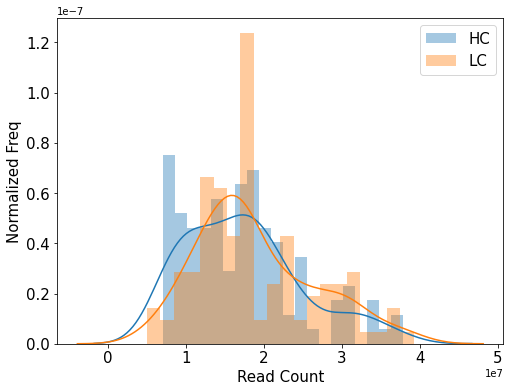

In [51]:
plt.figure(figsize=(8,6))

sns.distplot(df[df['group']=='HC']['read_count'],label='HC',bins=20)
sns.distplot(df[df['group']=='LC']['read_count'],label='LC',bins=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Normalized Freq',fontsize=15)
plt.xlabel('Read Count',fontsize=15)

plt.legend(fontsize=15)
plt.show()

Text(0, 0.5, 'Read Count')

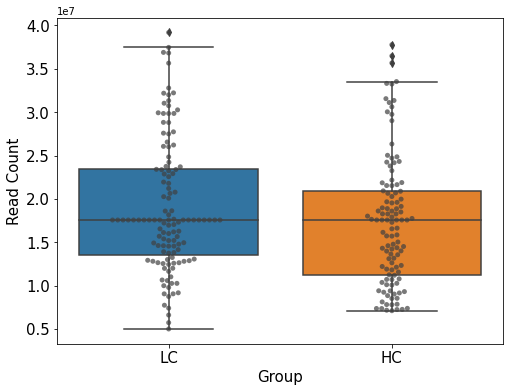

In [52]:
plt.figure(figsize=(8,6))

sns.boxplot(data=df,x='group',y='read_count')
sns.swarmplot(data=df,x='group',y='read_count',color='0.25',alpha=0.7)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Group',fontsize=15)
plt.ylabel('Read Count',fontsize=15)

In [53]:
a = df[df['group'] == 'HC']['read_count']
b = df[df['group'] == 'LC']['read_count']
mannwhitneyu(a,b)

MannwhitneyuResult(statistic=6219.0, pvalue=0.0816381413319876)

In [61]:
tmpdf = df_raw[df_raw['read_count'] > 40000000].copy()
tmpdf['target_count'] = int(df_raw['read_count'].median())

In [63]:
tmpdf

Sample ID  read_count  target_count
1       LD-88    50472279      18011389
5       LV-10    47117651      18011389
29      HD-60    43932195      18011389
33      LD-16    43130558      18011389
46      LD-30    42615327      18011389
47      LD-49    44005206      18011389
60      LD-97    71960810      18011389
66      LD-22    44419286      18011389
68      LD-39    45687516      18011389
75      LD-75    74558864      18011389
82       HD-8    41016722      18011389
88      LD-73    41488331      18011389
124     LD-35    62367705      18011389
125     HD-29    46640117      18011389
127     LD-85    53006383      18011389
141     LD-45    69546651      18011389
158     LD-11   101043083      18011389
165     LD-51    54531866      18011389
167     LD-84    40656587      18011389
176      LD-6    45484828      18011389
177     HD-31    41278889      18011389
179     LD-26    49044751      18011389
185     LD-77    48503777      18011389
202     HD-52    50503083      18011389

In [64]:
tmpdf.to_csv('../data/downsample.csv',index=None)

## remove HV-27, don't forget